In [55]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.datasets import load_breast_cancer
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.decomposition import PCA
from sklearn.metrics import accuracy_score

In [2]:
def PRINT(msg):
    print('*'*80)
    print(msg)
    print('*'*80)
def PRINTL():
    print('*'*80)

# Collect the Data #

In [3]:
dataset = load_breast_cancer()

In [4]:
cancer_data_df = pd.DataFrame(data = dataset.data, columns=dataset.feature_names)
cancer_data_df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [5]:
cancer_label_df = pd.DataFrame(data = dataset.target, columns = [f'label'])
cancer_label_df.head()

,label
0,0
1,0
2,0
3,0
4,0


In [6]:
cancer_df = pd.concat([cancer_data_df, cancer_label_df], axis=1)
cancer_df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,label
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


# EDA - Exploratory Data Analysis #

First, we'll begin by examining and visualizing the dataset to understand its structure, patterns, and anomalies before modeling. We'll then summarize key statistics, handle missing values, and visualize relationships using tools like histograms, box plots, and heatmaps. EDA helps uncover insights, detect outliers, and guides data cleaning and feature selection. It is a crucial early step to ensure high-quality input for machine learning models, which is why we start with it.

## Examining & visualizing the Dataset ##

In [7]:
cancer_df

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,label
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,0
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,0
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,0
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,0


In [8]:
cancer_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

In [9]:
cancer_df.describe()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,label
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,0.627417
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,0.483918
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,0.000000
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,0.000000
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,1.000000
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,1.000000
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,1.000000


## Handle Missing Values ##

In [10]:
cancer_df.isnull().sum()

mean radius                0
mean texture               0
mean perimeter             0
mean area                  0
mean smoothness            0
mean compactness           0
mean concavity             0
mean concave points        0
mean symmetry              0
mean fractal dimension     0
radius error               0
texture error              0
perimeter error            0
area error                 0
smoothness error           0
compactness error          0
concavity error            0
concave points error       0
symmetry error             0
fractal dimension error    0
worst radius               0
worst texture              0
worst perimeter            0
worst area                 0
worst smoothness           0
worst compactness          0
worst concavity            0
worst concave points       0
worst symmetry             0
worst fractal dimension    0
label                      0
dtype: int64

As we can see above, there are no missing values in our cancer dataset.

## Detection of Outliers ##

In [11]:
cancer_df.shape

(569, 31)

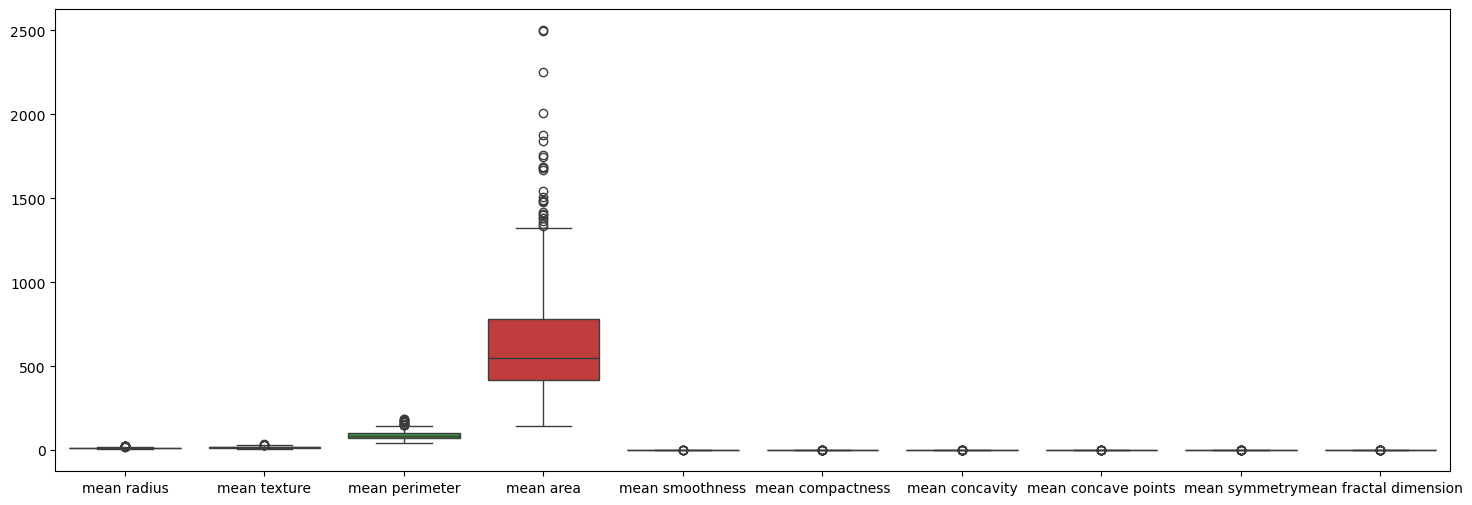

In [12]:
plt.figure(figsize=(18, 6)) 
sns.boxplot(data=cancer_df[list(cancer_df.columns)[:10]])
plt.show()

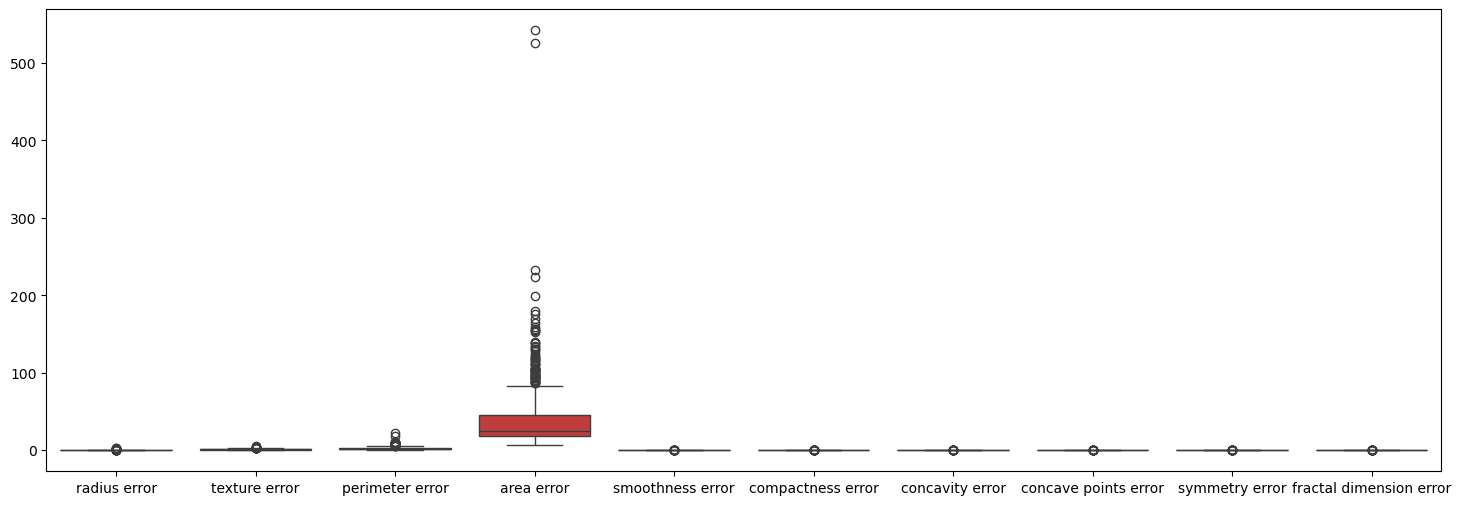

In [13]:
plt.figure(figsize=(18,6))
sns.boxplot(data=cancer_df[list(cancer_df.columns)[10:20]])
plt.show()

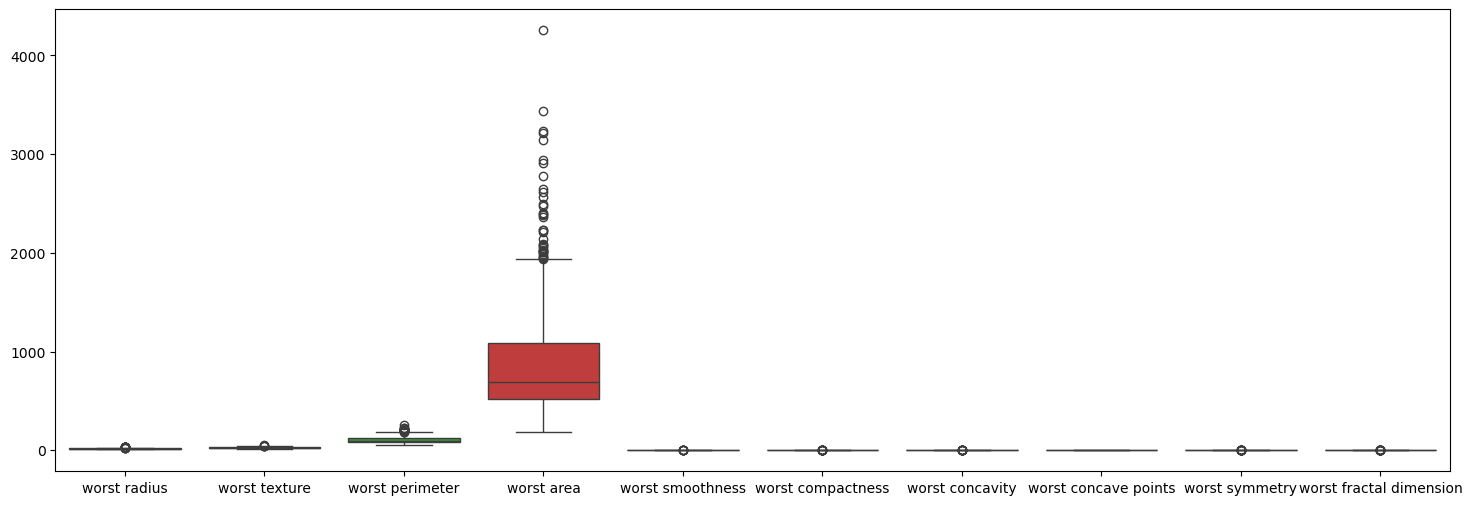

In [14]:
plt.figure(figsize=(18,6))
sns.boxplot(data=cancer_df[list(cancer_df.columns)[20:30]])
plt.show()

As we can see from the three boxplots above, there are only three features that clearly show problems with outliers. These features are: `mean area`, `area_error`, and `worst_area`. The outliers are all upper outliers, which satisfy the following condition:

$$
\text{Value} > Q3 + 1.5 \times IQR
$$

where **Q3** is the third quartile, and **IQR** (Interquartile Range) is calculated as:

$$
IQR = Q3 - Q1
$$


In [15]:
def count_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
    return len(outliers)

In [16]:
PRINT('Outliers precentage check:')
print(f'mean area column -> {round(count_outliers(cancer_df, "mean area") / cancer_df.shape[0] *100, 3)}%')
print(f'area error column -> {round(count_outliers(cancer_df, "area error") / cancer_df.shape[0] *100, 3)}%')
print(f'worst area column -> {round(count_outliers(cancer_df, "worst area") / cancer_df.shape[0] *100, 3)}%')
print(f'There is total {cancer_df.shape[0]} rows')
PRINTL()

********************************************************************************
Outliers precentage check:
********************************************************************************
mean area column -> 4.394%
area error column -> 11.424%
worst area column -> 6.151%
There is total 569 rows
********************************************************************************


We'll keep the option to drop these columns from our dataset in order to help our ML model learn from the features more effectively and reduce any bias that outlier values might introduce.

## Visualize Correlation & Distributions ##

### Visualize Feature Correlation ###

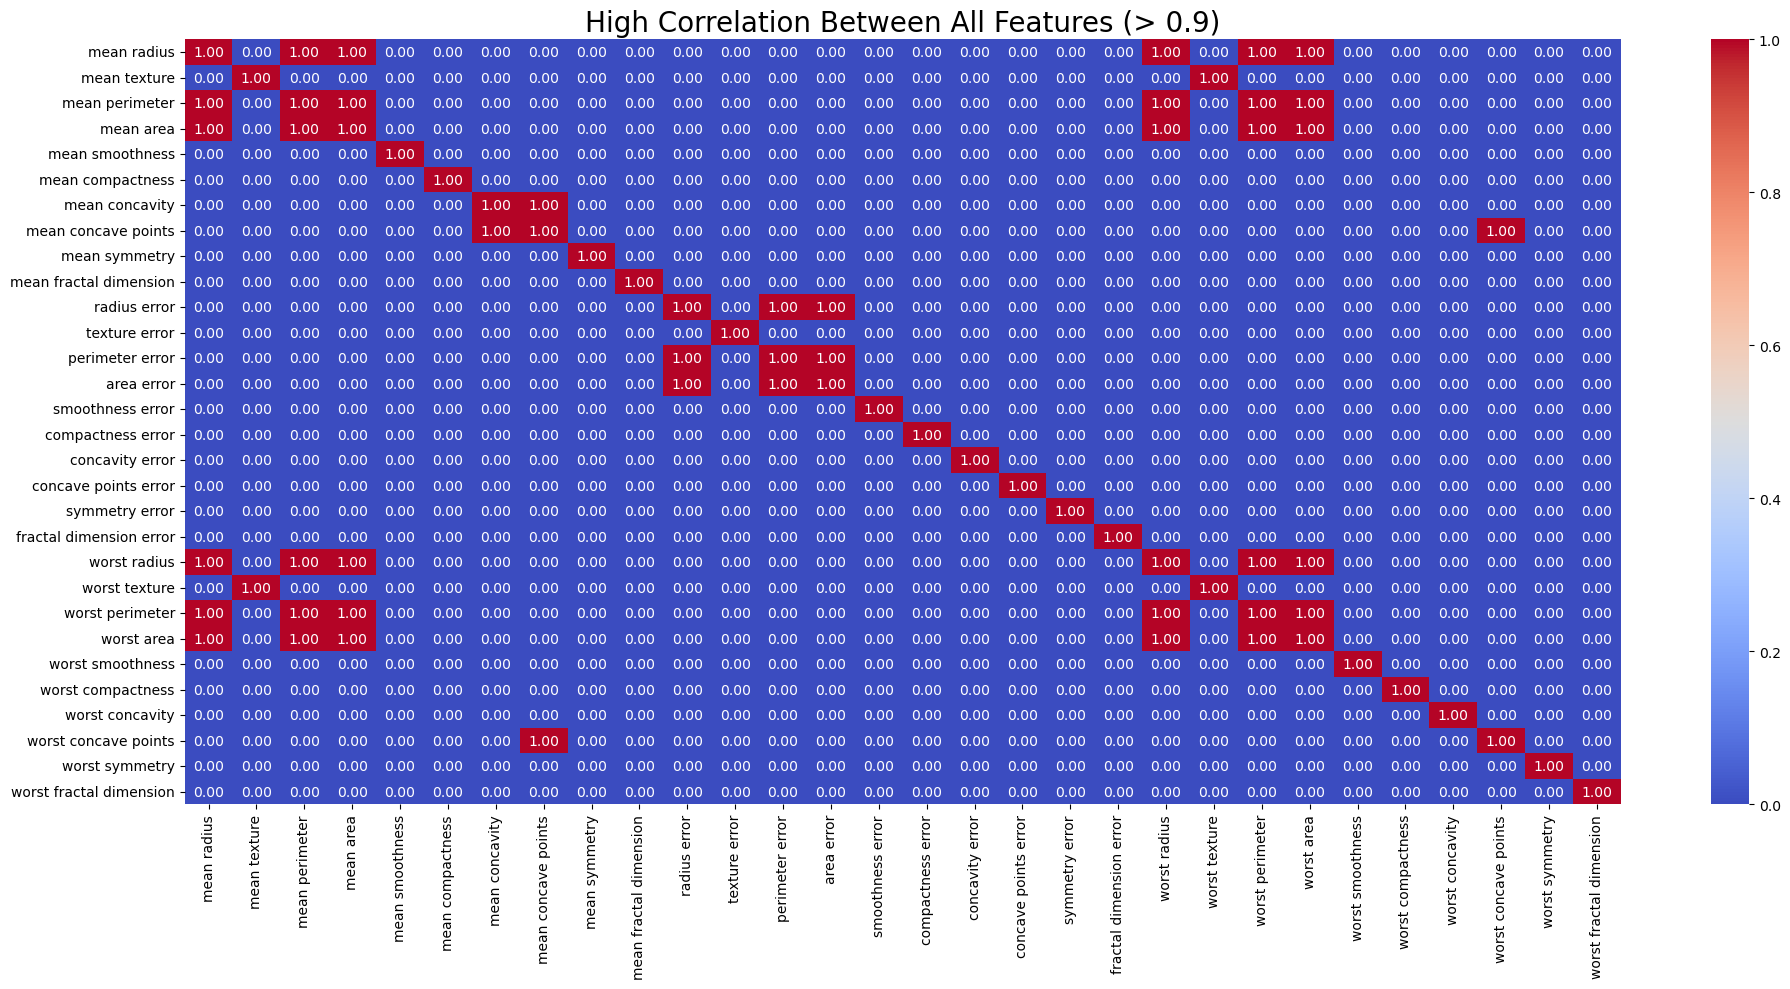

In [17]:
plt.figure(figsize=(20, 10))
sns.heatmap(cancer_df.drop(columns=['label']).corr() > 0.9, annot=True, fmt=".2f", cmap='coolwarm')
plt.title('High Correlation Between All Features (> 0.9)', fontsize = 20)
plt.tight_layout()
plt.show()

- `area error` -> is in high correlation with 2 features
- `mean area` -> is in high correlation with 5 features
- `worst area` -> is in high correlation with 5 features

In order to avoid multicollinearity in order dataset, which can confuse linear models. Also if two or more features have a very high correlation (e.g., > 0.9), they likely contain overlapping information.

### Visualize Features Distribution ###

To make informed decisions about our dataset before training—such as whether and how to normalize the data (e.g., using StandardScaler or MinMaxScaler)—we will first visualize the distribution of each feature individually.

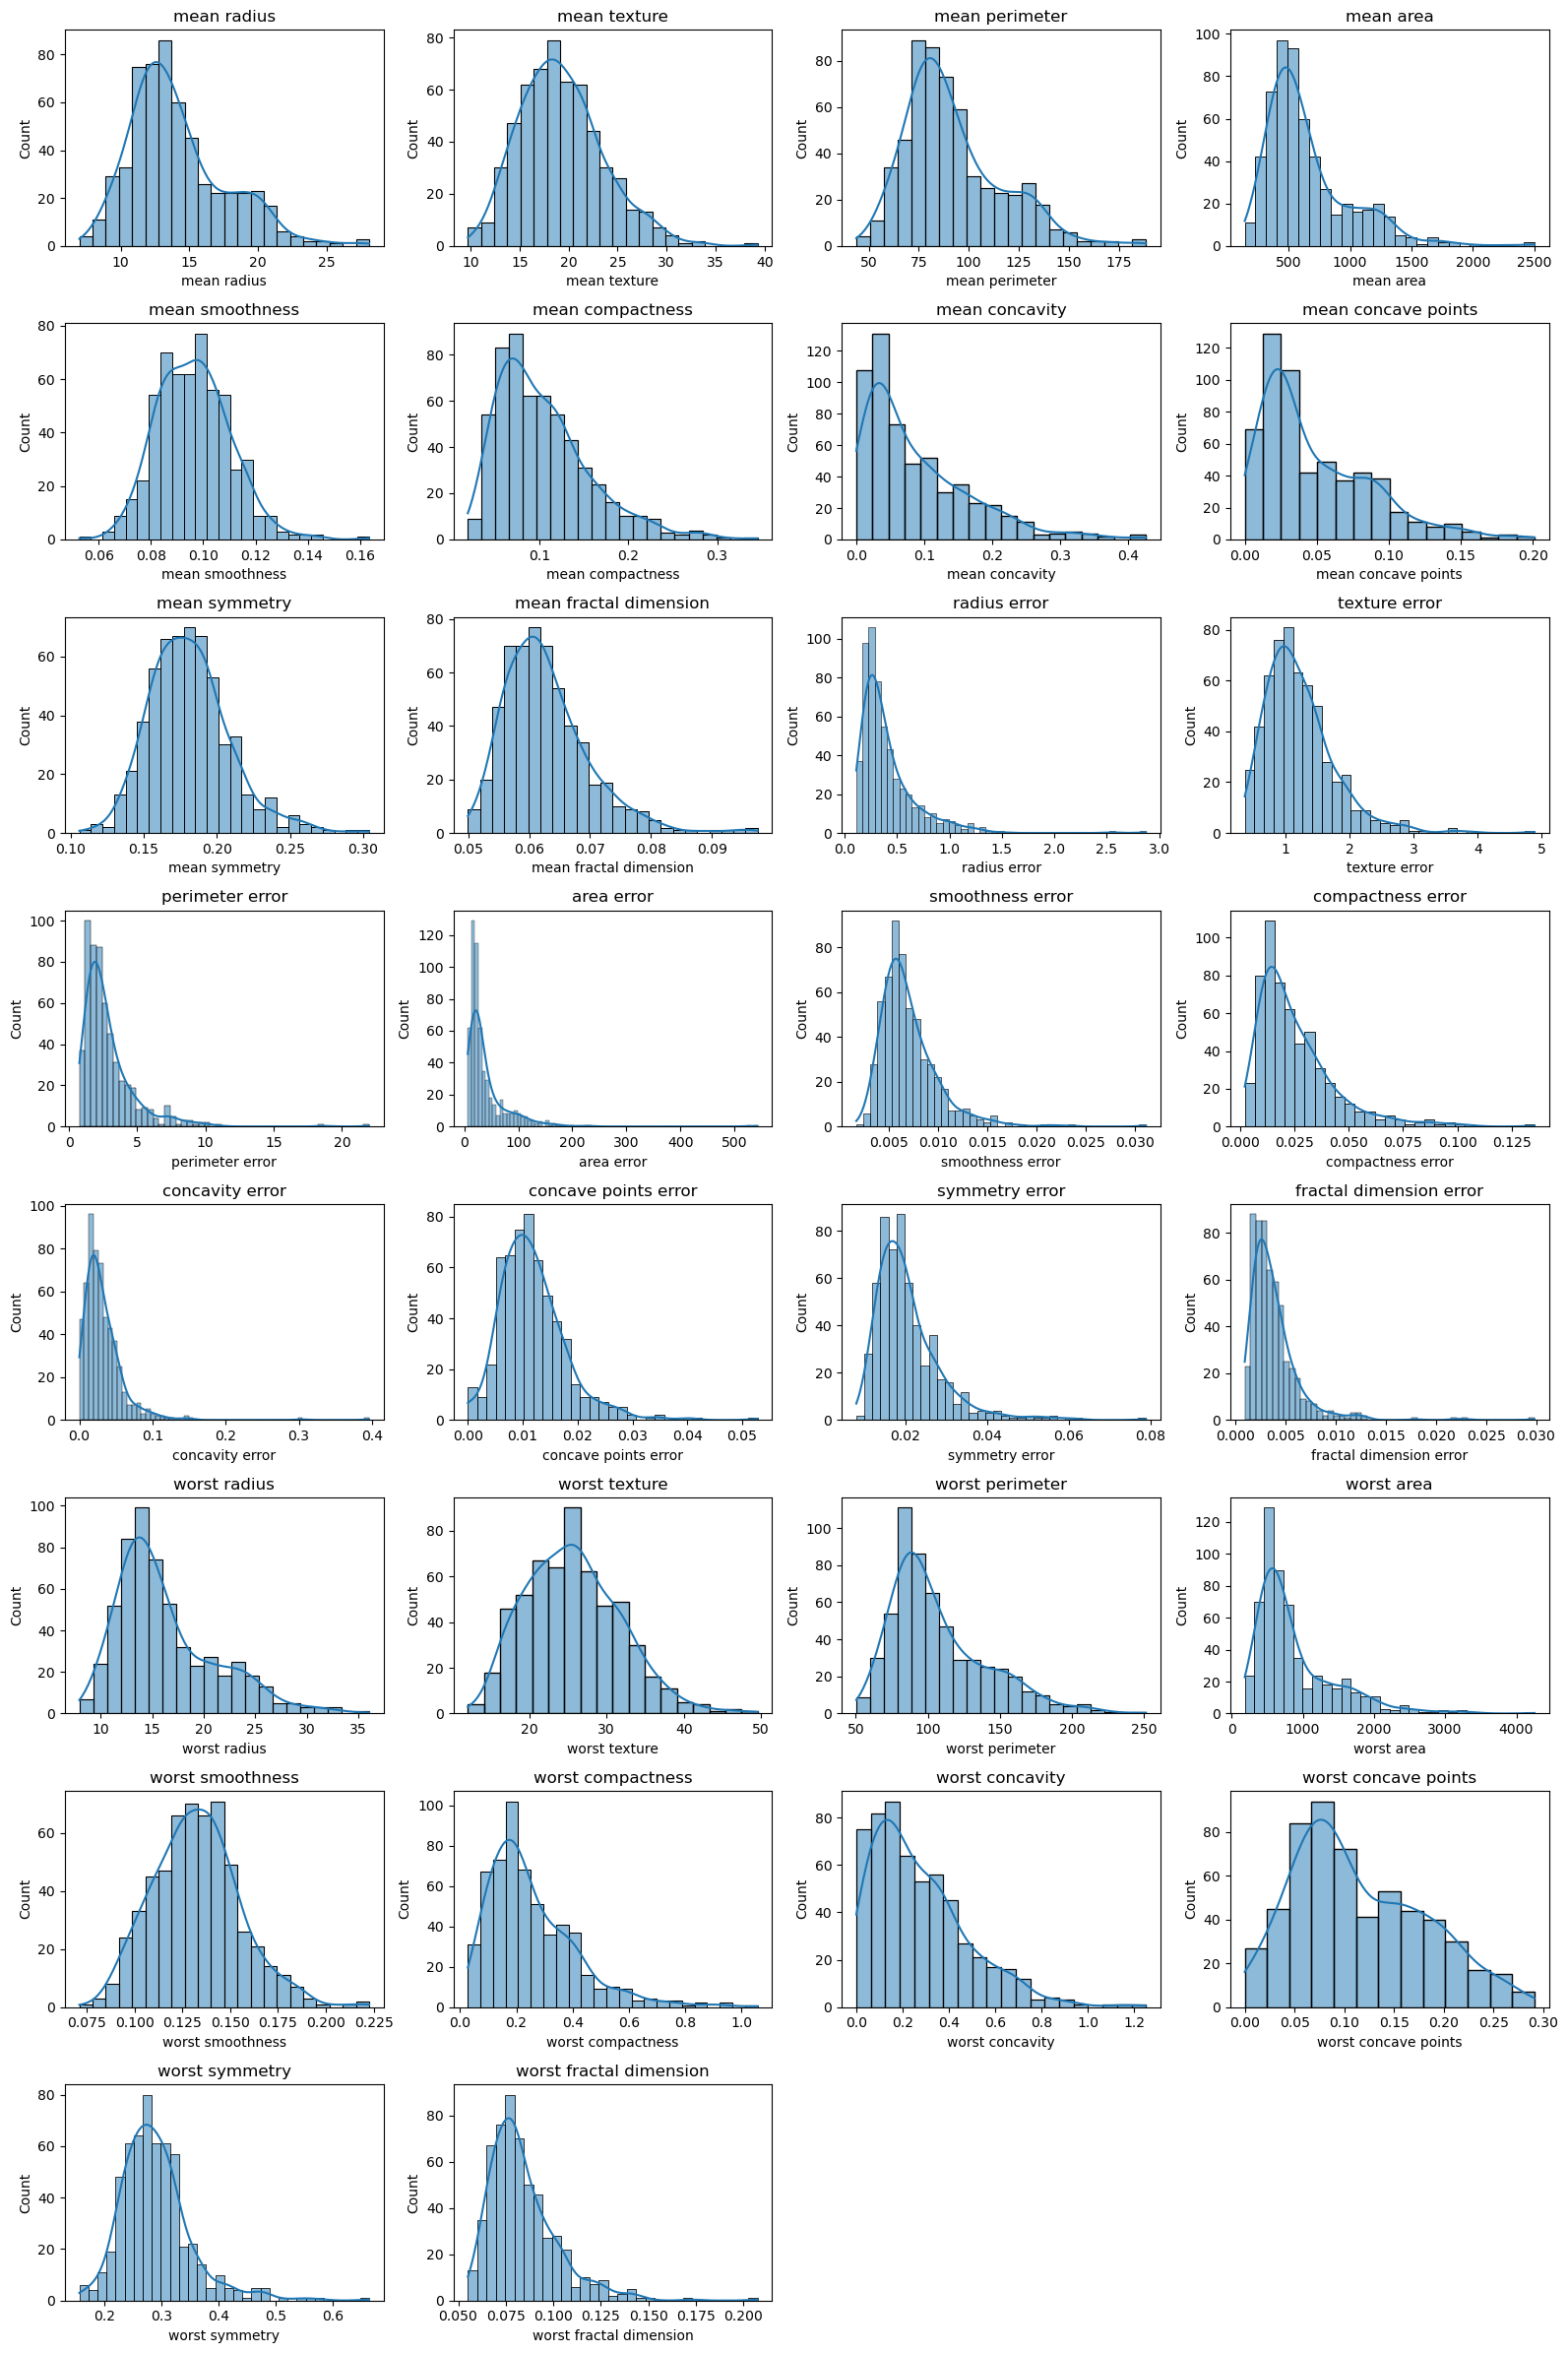

In [54]:
numeric_cols = cancer_df.iloc[:, :-1].select_dtypes(include='number').columns

# determine grid size
n_cols = 4 
n_rows = -(-len(numeric_cols) // n_cols)  


fig, axes = plt.subplots(n_rows, n_cols, figsize=(4*n_cols, 3*n_rows))
axes = axes.flatten()

# plot each histogram
for i, col in enumerate(numeric_cols):
    sns.histplot(cancer_df[col], kde=True, ax=axes[i])
    axes[i].set_title(col)

# hide unused subplots
for j in range(i + 1, len(axes)):
    axes[j].set_visible(False)

plt.tight_layout()
plt.show()

As we can see above, 99% of all features are normally distributed (some perfectly normal, others with left or right skew). Therefore, during the feature engineering phase, we will scale the features using Standardization (Z-score).

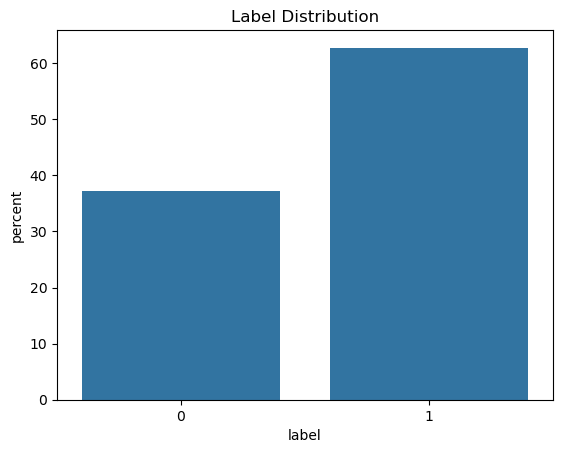

In [18]:
sns.countplot(data=cancer_df, x='label', stat='percent')
plt.title('Label Distribution')
plt.show()

There is a clear imbalance in our labels: approximately one-third of the data represents non-malignant cancer cases, while the remaining two-thirds correspond to other types. In our training phase we'll implement class balance techniques in order to adress that issue

# Feature Engineering and Selection #

In [56]:
cancer_df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,label
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


## Scale the Dataset ##

As seen before, the data is normally distributed. Therefore, we will scale it using **standardization (Z-score normalization)**, which is defined by the formula:

$$
Z = \frac{X - \mu}{\sigma}
$$

where:
- X is the original feature value,
- $\mu$ is the mean of the feature,
- $\sigma$ is the standard deviation of the feature.

In [78]:
scaler = StandardScaler()

# scale only the feature & concate the label afterwards
scaled_features = scaler.fit_transform(cancer_df.iloc[:, :-1])
cancer_df_ = pd.DataFrame(data=scaled_features, columns=list(cancer_df.columns)[:-1])
cancer_df = pd.concat([cancer_df_, cancer_df.iloc[:, -1]], axis=1)

cancer_df.tail()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,label
564,2.110995,0.721473,2.060786,2.343856,1.041842,0.219060,1.947285,2.320965,-0.312589,-0.931027,...,0.117700,1.752563,2.015301,0.378365,-0.273318,0.664512,1.629151,-1.360158,-0.709091,0
565,1.704854,2.085134,1.615931,1.723842,0.102458,-0.017833,0.693043,1.263669,-0.217664,-1.058611,...,2.047399,1.421940,1.494959,-0.691230,-0.394820,0.236573,0.733827,-0.531855,-0.973978,0
566,0.702284,2.045574,0.672676,0.577953,-0.840484,-0.038680,0.046588,0.105777,-0.809117,-0.895587,...,1.374854,0.579001,0.427906,-0.809587,0.350735,0.326767,0.414069,-1.104549,-0.318409,0
567,1.838341,2.336457,1.982524,1.735218,1.525767,3.272144,3.296944,2.658866,2.137194,1.043695,...,2.237926,2.303601,1.653171,1.430427,3.904848,3.197605,2.289985,1.919083,2.219635,0
568,-1.808401,1.221792,-1.814389,-1.347789,-3.112085,-1.150752,-1.114873,-1.261820,-0.820070,-0.561032,...,0.764190,-1.432735,-1.075813,-1.859019,-1.207552,-1.305831,-1.745063,-0.048138,-0.751207,1


## PCA ## 

Principal Component Analysis (PCA) was applied to the Breast Cancer dataset to reduce its dimensionality from 30 features to 2, while retaining most of the variance.

In [79]:
tdf = cancer_df.copy()

In [80]:
features = cancer_df.iloc[:,:-1].to_numpy()
labels = cancer_df.iloc[:,-1].to_numpy()

********************************************************************************
PCA variance ratio -> [0.44272026 0.18971182]
********************************************************************************


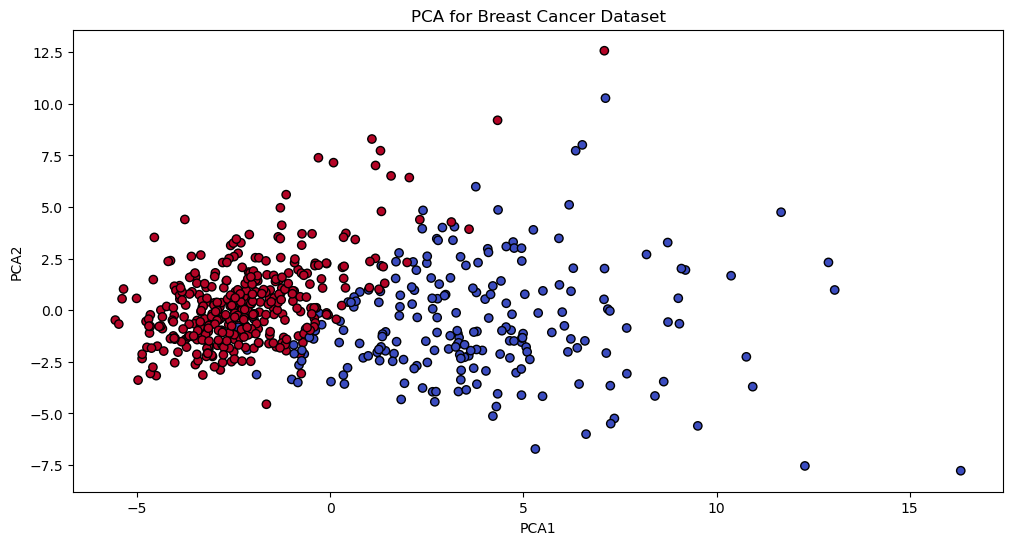

In [84]:
# reduce to 2D for better visualization
pca = PCA(n_components=2)
X_pca = pca.fit_transform(features)

PRINTL()
print(f'PCA variance ratio -> {pca.explained_variance_ratio_}')
PRINTL()
# plot the results
plt.figure(figsize=(12,6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=labels, cmap='coolwarm', edgecolor='k')
plt.xlabel('PCA1')
plt.ylabel('PCA2')
plt.title('PCA for Breast Cancer Dataset')
plt.show()

The explained variance ratio of the two principal components is: `[0.9820, 0.0161]` This means that PC1 alone captures 98.2% of the dataset’s variance, and PC2 adds another 1.6%, totaling ~99.8% of the variance preserved with just two components.

The PCA scatter plot shows clear separation between the two classes (malignant and benign), primarily along the first principal component (PC1). This indicates that PCA effectively reduces dimensionality while preserving important class-discriminative information.

In [86]:
pca_df_x = pd.DataFrame(X_pca, columns=['PCA1', 'PCA2'])
pca_df = pd.concat([pca_df_x, cancer_df.iloc[:, -1]], axis=1)

pca_df.head()

,PCA1,PCA2,label
0,9.192837,1.948583,0
1,2.387802,-3.768172,0
2,5.733896,-1.075174,0
3,7.122953,10.275589,0
4,3.935302,-1.948072,0
